In [1]:
import autograd
import autograd.numpy as np

import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15, 10)
import matplotlib.pyplot as plt

In [20]:
#define some rather abitrary non-convex function
def f(x):
    return (2*x-6.9)*(x-5.2)*(x-4)*(x+ 1.33)*(x+2.8)*(x+3.1)/25

def zero(x):
    return 0.0*x

In [21]:
#by the magic of autograd
dfdx = autograd.elementwise_grad(f)
d2fdx2 = autograd.elementwise_grad(dfdx)
d3fdx3 = autograd.elementwise_grad(d2fdx2)
d4fdx4 = autograd.elementwise_grad(d3fdx3)
d5fdx5 = autograd.elementwise_grad(d4fdx4)
d6fdx6 = autograd.elementwise_grad(d5fdx5)
grads = [f,dfdx,d2fdx2,d3fdx3,d4fdx4,d5fdx5,d6fdx6,zero]

In [27]:
x = np.linspace(-4,7,100)
#pick some points
a = -2.0 #saddle point
b = 4.0 #global minimum
c = 0.9 #nothing special

In [23]:
def plotter(point_flag = True, grad_flag = True):
    fig, axarr = plt.subplots(4, 2, sharex='col', sharey='row')
    counter = 0
    for i in range(4):
        for j in range(2):
            if grad_flag:
                axarr[i,j].plot(x,grads[counter](x))
            if point_flag:
                axarr[i,j].scatter(a,grads[counter](a),c = 'g')
                axarr[i,j].scatter(b,grads[counter](b),c='r')
                axarr[i,j].scatter(c,grads[counter](c),c='y')
                axarr[i,j].set_ylim([-150,150])
            axarr[i,j].grid(b=True, which='major', color='k', linestyle='-')
            counter += 1
    plt.show()

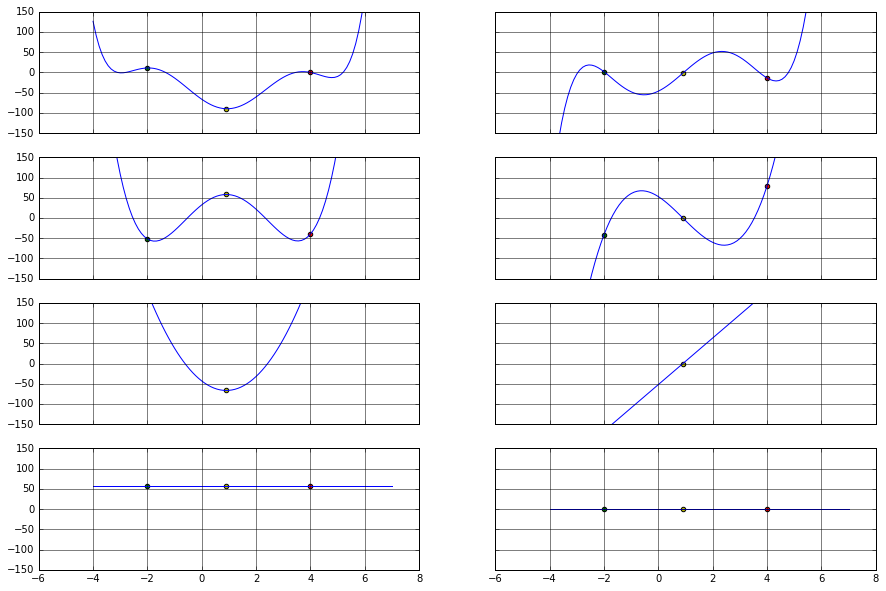

In [28]:
plotter()

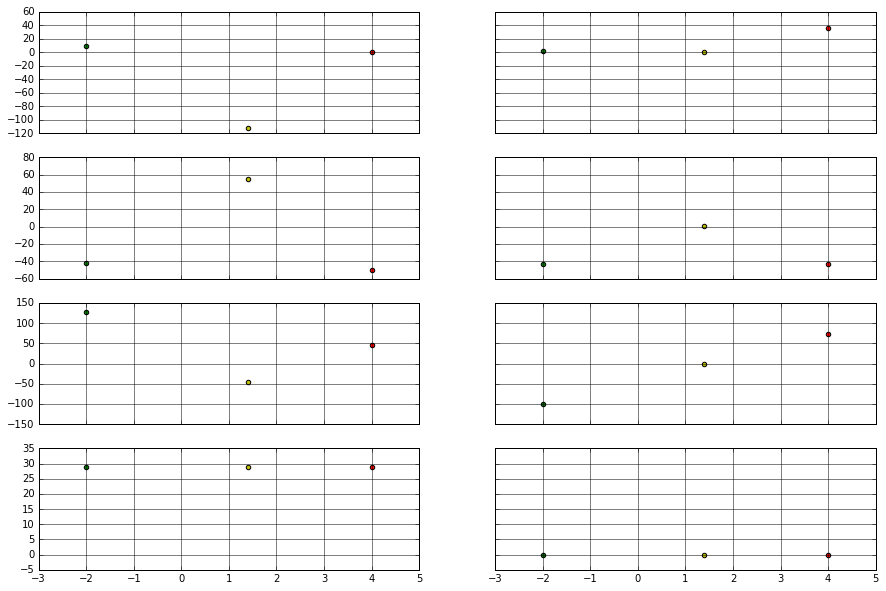

In [12]:
plotter(grad_flag = False)


It seems interesting that no matter what, when you are optimising a polynomial function there is a (friendly) convex equation hiding in there telling you where the global minima is. In this case it is the 4th order derivative.

Gradient descent is nice as you should find a slightly better position.
Calculating higher order gradients doesnt garantee any extra information (if the function is not polynomial)

# Questions

* What happens for extremely high order polynomials? When $p \rightarrow \infty$
* What does the order of the polynomial equation relate to? Some level of complexity?
* This only applies to polynomials. Or can polynomials be universal if $x \in \mathbb{C}$?


Neural networks are (can be) universal functions so we cannot build an optimiser that can run fast. (why?) Unless, the optimiser recieves information about the type of problem, and thus can construct a probability distubution over likely functions. 

# Heuristics

* If the first derivative is very small, double check neighborhoods?
* 


## What am I really doing here? 
Looking for heuristics/patterns/information in the higher order derivatives that can help find the global minima faster and more reliably.

## Automation: How could an algorithm learn to do this? 
Train it on solutions that we know or that can be figured out via brute force? How are we going to optimise this learning algorithm? With an older or current version of itself? 

So the loss of this learner would be the amount of computations it takes to find the solution.

Bias in training could significantly effect what it learns. e.g. if there are many instances of a specific type of optimisation problem, the algorithm will adapt to specialse at those as it will reduce the loss. Isn't this what we want? No, because now we have lost generality. 

> So it seems as though there is a trade off, you cannot have efficiency and generality?

How is this better than traditional optimisation? Now we have to train an algorithm to learn to solve certain types of optimisation problem quickly. So upfront we have to train the learner, and then it solves the specific type of problem faster. So we have a (high) constant upfront computational cost with a low computational cost (O(N???)) versus ??? computational cost (O($N^D$)) for every optimisaiton problem (N) we solve.



# Update rules

### Newton

For the second order taylor expansion
$f_T(x)=f_T(x_n+\Delta x) \approx f(x_n)+f'(x_n)\Delta x+\frac 1 2 f''(x_n) \Delta x^2$


$\mathbf{x}_{n+1} = \mathbf{x}_n - [\mathbf{H}:f(\mathbf{x}_n)]^{-1} \nabla f(\mathbf{x}_n)$

So newtons method doesnt help us avoid local minima. It helps us to get there faster...
Also, has issues with saddle points? As the gradient is = 0???